Input state |00⟩ → Final state: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
Input state |01⟩ → Final state: [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
Input state |10⟩ → Final state: [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
Input state |11⟩ → Final state: [0.+0.j 0.+0.j 0.+0.j 1.+0.j]


(<Figure size 700x300 with 1 Axes>, <Axes: >)

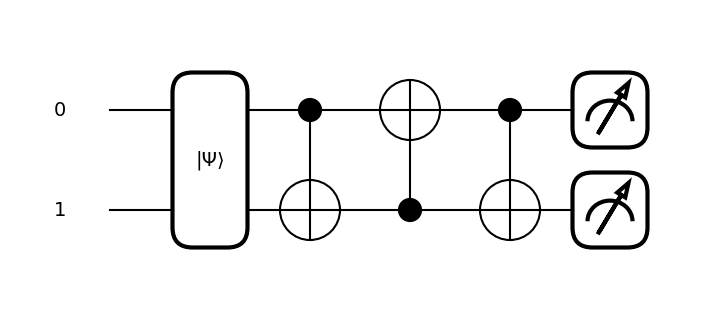

In [5]:
import pennylane as qml
from pennylane import numpy as np

# Create a PennyLane device with 2 qubits
dev = qml.device("default.qubit", wires=2)

# Define the SWAP operation using CNOT gates
def swap_gate_circuit():
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 0])
    qml.CNOT(wires=[0, 1])

# Define a QNode to execute the circuit
@qml.qnode(dev)
def apply_swap(state):
    qml.StatePrep(state, wires=[0, 1])  # Initialize qubits
    swap_gate_circuit()  # Apply SWAP using CNOTs
    return qml.state()

# Define test cases: |00⟩, |01⟩, |10⟩, |11⟩
test_states = {
    "|00⟩": np.array([1, 0, 0, 0]),  # Should remain |00⟩
    "|01⟩": np.array([0, 1, 0, 0]),  # Should swap to |10⟩
    "|10⟩": np.array([0, 0, 1, 0]),  # Should swap to |01⟩
    "|11⟩": np.array([0, 0, 0, 1])   # Should remain |11⟩
}

# Run the test cases
for label, state in test_states.items():
    final_state = apply_swap(state)
    print(f"Input state {label} → Final state: {final_state}")

qml.draw_mpl(apply_swap)([0, 1, 0, 0])
# plt.show()